# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [127]:
%matplotlib inline

from IPython.display import display

import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


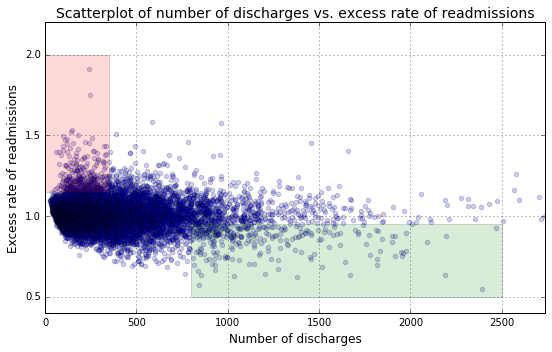

In [68]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [65]:
#
# Re-read in readmissions data provided.
#
df = pd.read_csv('data/cms_hospital_readmissions.csv')

In [6]:
#
# Look at the head.
#
df.head()

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
0,FROEDTERT MEMORIAL LUTHERAN HOSPITAL,520177,WI,READM-30-HIP-KNEE-HRRP,242,NaN,1.9095,10.8,5.6,38.0,07/01/2010,06/30/2013
1,PROVIDENCE HOSPITAL,90006,DC,READM-30-HIP-KNEE-HRRP,247,NaN,1.7521,9.2,5.3,33.0,07/01/2010,06/30/2013
2,BEAUFORT COUNTY MEMORIAL HOSPITAL,420067,SC,READM-30-HIP-KNEE-HRRP,586,NaN,1.5836,7.6,4.8,53.0,07/01/2010,06/30/2013
3,ADVOCATE CHRIST HOSPITAL & MEDICAL CENTER,140208,IL,READM-30-HIP-KNEE-HRRP,965,NaN,1.5760,9.0,5.7,95.0,07/01/2010,06/30/2013
4,BRAZOSPORT REGIONAL HEALTH SYSTEM,450072,TX,READM-30-HIP-KNEE-HRRP,149,NaN,1.5308,8.2,5.4,20.0,07/01/2010,06/30/2013


In [7]:
#
# Print the info.
#
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 12 columns):
Hospital Name                 16860 non-null object
Provider Number               16860 non-null int64
State                         16860 non-null object
Measure Name                  16860 non-null object
Number of Discharges          16860 non-null object
Footnote                      3129 non-null float64
Excess Readmission Ratio      13731 non-null float64
Predicted Readmission Rate    13731 non-null float64
Expected Readmission Rate     13731 non-null float64
Number of Readmissions        11497 non-null float64
Start Date                    16860 non-null object
End Date                      16860 non-null object
dtypes: float64(5), int64(1), object(6)
memory usage: 1.5+ MB


In [57]:
#
# Clean the data by removing hospitals without readmission information.
#
df_clean = pd.DataFrame(df[~np.isnan(df["Number of Readmissions"])])
df_clean["Number of Discharges"] = df_clean["Number of Discharges"].astype(int)

#
# Print the clean dataframe information.
#
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11497 entries, 0 to 13730
Data columns (total 12 columns):
Hospital Name                 11497 non-null object
Provider Number               11497 non-null int64
State                         11497 non-null object
Measure Name                  11497 non-null object
Number of Discharges          11497 non-null int64
Footnote                      0 non-null float64
Excess Readmission Ratio      11497 non-null float64
Predicted Readmission Rate    11497 non-null float64
Expected Readmission Rate     11497 non-null float64
Number of Readmissions        11497 non-null float64
Start Date                    11497 non-null object
End Date                      11497 non-null object
dtypes: float64(5), int64(2), object(5)
memory usage: 1.1+ MB


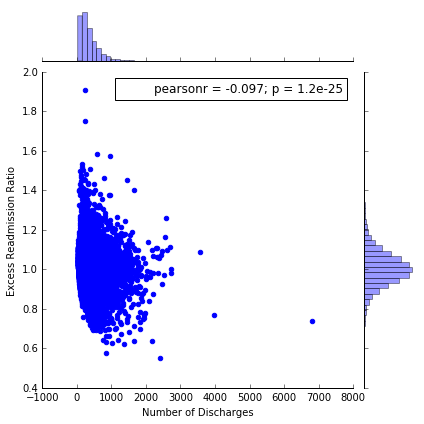

In [58]:
#
# Plot "Number of Discharges" vs "Excess Readmission Ratio" for hospitals with an "Excess Readmission Ratio" over 1.
#
sns.jointplot(x="Number of Discharges", y="Excess Readmission Ratio", data=df_clean)

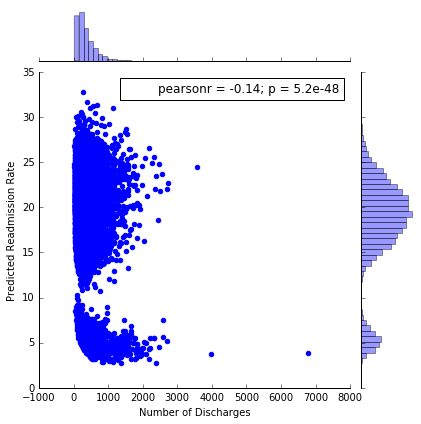

In [56]:
#
# Plot the ratio of "Number of Readmissions" to "Number of Discharges" vs "Excess Readmission Ratio", for hospitals 
# with an "Excess Readmission Ratio" over 1.
#
sns.jointplot(x="Number of Discharges", y="Predicted Readmission Rate", data=df_clean)

In [122]:
#
# Get the hospitals with precent readmissions that are 10% and better as well as have discharged at least 500 patients.
#
df_low = pd.DataFrame(df_clean[df_clean["Predicted Readmission Rate"] <= 10])

#
# Look at the data for the lowest readmission percentages.
#
df_low.groupby("Predicted Readmission Rate").sum().head(10)

,Provider Number,Number of Discharges,Footnote,Excess Readmission Ratio,Expected Readmission Rate,Number of Readmissions
Predicted Readmission Rate,,,,,,
2.7,50769,2393,NaN,0.5495,4.9,54.0
2.8,110082,1379,NaN,0.6195,4.5,30.0
2.9,880282,2821,NaN,1.9371,13.6,59.0
3.0,50108,1032,NaN,0.6262,4.8,23.0
3.1,260170,2125,NaN,1.3565,9.1,52.0
3.2,2631035,10245,NaN,6.4905,40.4,278.0
3.3,1971538,6171,NaN,5.2374,31.1,168.0
3.4,1931411,7940,NaN,6.5590,42.3,220.0
3.5,2731224,8187,NaN,7.4472,47.3,234.0


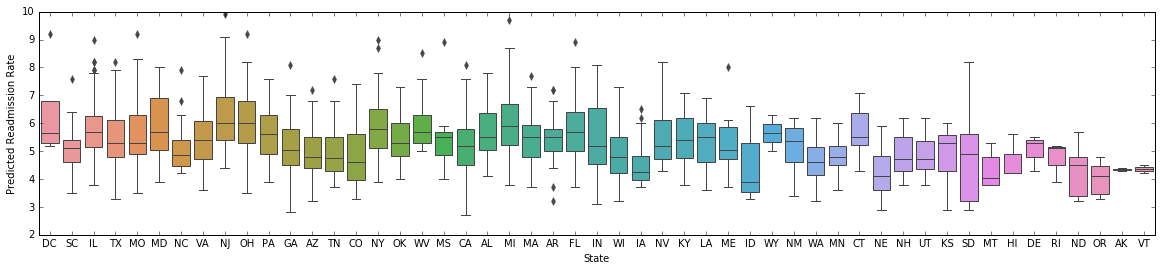

In [63]:
#
# Anything interesting by state?
#
fig, ax = plt.subplots(figsize=(20, 4))
sns.boxplot(x="State", y="Predicted Readmission Rate", data=df_low)

## A. Do you agree with the above analysis and recommendations? Why or why not?

- No, the above analysis is quick to jump to conclusions from very little analysis.  I agrese that the overall the rate of readamissions is trending down with increasing number of discharges.  However, there is no math backing up any of the claims in the report.  For example, the report claims that "There is a significant correlation between hospital capacity (number of discharges) and readmission rates.".  The report does not mention if this is a positive or negative correlation or provide the strength of this correlation.  Recommendations are also quick to be made.  There is no information on the facilities of the hospitals so providing a recommendation that "Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation." are unfounded.

## B.  Provide support for your arguments and your own recommendations with a statistically sound analysis.

### 1. Hypothesis Test: Hospitals with a large number of discharges (> 1000) have the same mean excess readmission rate as hospitals with a smaller number of discharges (< 100).

- H0: μ<sub>large</sub> = μ<sub>small</sub>

### 2. Compute and report the observed significance value (or p-value).

In [113]:
#
# Split the hospitals in to large (> 1000) and small (< 100) and have an "Excess Readmission Ratio" over 1.
#
excess_rate_large = df_clean[(df_clean["Number of Discharges"] > 1000) & (df_clean["Excess Readmission Ratio"] > 1)]["Excess Readmission Ratio"]
excess_rate_small = df_clean[(df_clean["Number of Discharges"] < 100) & (df_clean["Excess Readmission Ratio"] > 1)]["Excess Readmission Ratio"]

#
# Check for normal distribution.
#
stats.normaltest(excess_rate_large)

NormaltestResult(statistic=96.713731508165807, pvalue=9.9742452104346772e-22)

In [114]:
#
# Check for normal distribution.
#
stats.normaltest(excess_rate_small)

NormaltestResult(statistic=632.72588168565051, pvalue=4.0301435285653915e-138)

In [115]:
#
# Run a two-sample t-test on the data.
#
stats.ttest_ind(excess_rate_large, excess_rate_small)

Ttest_indResult(statistic=6.0545982400982616, pvalue=2.021016144897848e-09)

### 3. Report statistical significance for  α  = .01.

In [116]:
#
# Calcualate the standard error.
#
se = stats.sem(excess_rate_large)

#
# Calculate the 99% confidence interval.
#
stats.t.interval(0.99, len(excess_rate_large) - 1, loc=np.mean(excess_rate_large), scale=se)

(1.066496452837272, 1.0909783044442811)

In [117]:
#
# Calcualate the standard error.
#
se = stats.sem(excess_rate_small)

#
# Calculate the 99% confidence interval.
#
stats.t.interval(0.99, len(excess_rate_small) - 1, loc=np.mean(excess_rate_small), scale=se)

(1.0475824450352378, 1.0572657573615665)

### 4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?

- From the tests above, we are able to confidently reject the null hypothesis as statistically the means are different.  However, looking at the 99% confidence intervals it is clear that practically the means are very close.

- From the above, of the offending hospitals, the hospitals with the greater number of discharges are worse on average than hospitals with fewer discharges. My recommendation would be to locate a nearby hospital based on the the ones in the dataframe "df_low" and compare their methods to the offending hospital.  The hospitals in "df_low" have very low excess readmission rates and therefore can serve as an example.  Hospitals with an excess readmission rate above 1 should be assigned a hospital to observe and implement changes based on their observations. After a trial period with the new changes, the hospital should then be reevaluated.

### 5. Look at the scatterplot above.

- What are the advantages and disadvantages of using this plot to convey information?
    - Advantages: It is easy to visualize the density and correlation of the two variables being plotted.   The colors provide easy markers to illustrate where the "good" and "bad" areas are of the plot.
    - Disadvantages: Its unclear what the green and red boxes are trying to communicate as they are not labeled.  Boxes are not appealing. 
    
- Construct another plot that conveys the same information in a more direct manner.

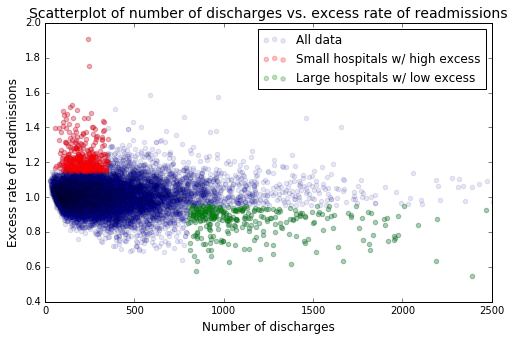

In [163]:
#
# Filter the data.
#
large = df_clean[(df_clean["Number of Discharges"] >= 800) & (df_clean["Number of Discharges"] <= 2500) & 
                 (df_clean["Excess Readmission Ratio"] >= 0.5) & (df_clean["Excess Readmission Ratio"] <= 0.95)]
small = df_clean[(df_clean["Number of Discharges"] <= 350) & (df_clean["Excess Readmission Ratio"] >= 1.15) & 
                 (df_clean["Excess Readmission Ratio"] <= 2)]

#
# Plot the data.
#
fig, ax = plt.subplots(figsize=(8, 5))
ax.scatter(df_clean["Number of Discharges"], df_clean["Excess Readmission Ratio"], alpha=0.1)
ax.scatter(small["Number of Discharges"], small["Excess Readmission Ratio"], color="red", alpha=0.25)
ax.scatter(large["Number of Discharges"], large["Excess Readmission Ratio"], color="green", alpha=0.25)

#
# Configure plot options.
#
ax.set_xlim([0, 2500])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)
ax.legend(["All data", "Small hospitals w/ high excess", "Large hospitals w/ low excess"], loc="upper right")
